In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_url = 'https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data = pd.read_csv(file_url)
data # 데이터셋 불러오고 출력

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [62]:
bins = [0,19,29,39,49,59,69]
labels = ['10대','20대','30대','40대','50대','60대']
data['나이대'] = pd.cut(data['age'],bins=bins,labels=labels,right=False)

In [63]:
data

,age,sex,bmi,children,smoker,charges,나이대
0,19,0,27.900,0,1,16884.92400,20대
1,18,1,33.770,1,0,1725.55230,10대
2,28,1,33.000,3,0,4449.46200,20대
3,33,1,22.705,0,0,21984.47061,30대
4,32,1,28.880,0,0,3866.85520,30대
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,50대
1334,18,0,31.920,0,0,2205.98080,10대
1335,18,0,36.850,0,0,1629.83350,10대
1336,21,0,25.800,0,0,2007.94500,20대


In [64]:
data['나이대'].value_counts()

20대    321
40대    276
50대    274
30대    259
60대    139
10대     69
Name: 나이대, dtype: int64

In [66]:
pd.get_dummies(data,columns=['나이대'])

,age,sex,bmi,children,smoker,charges,나이대_10대,나이대_20대,나이대_30대,나이대_40대,나이대_50대,나이대_60대
0,19,0,27.900,0,1,16884.92400,0,1,0,0,0,0
1,18,1,33.770,1,0,1725.55230,1,0,0,0,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0,0,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,0,0,0,1,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0,0,0
1335,18,0,36.850,0,0,1629.83350,1,0,0,0,0,0
1336,21,0,25.800,0,0,2007.94500,0,1,0,0,0,0


In [34]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='children', ylabel='count'>

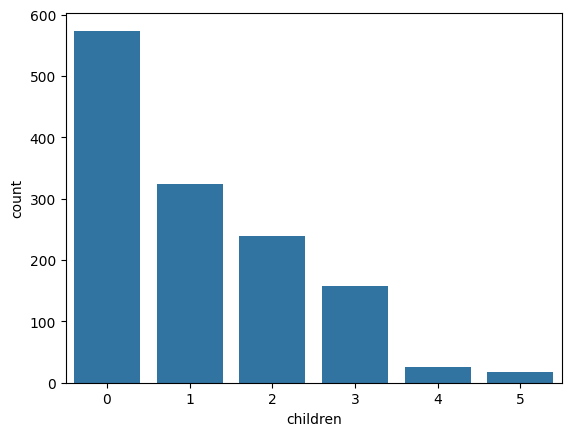

In [35]:
sns.countplot(x=data['children'])

<Axes: xlabel='sex', ylabel='count'>

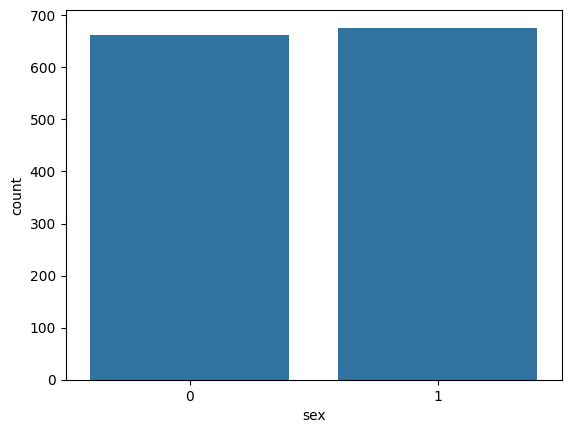

In [32]:
sns.countplot(x =data['sex']) # 남녀의 성비는 비슷하다고 볼 수 있음

<Axes: xlabel='smoker', ylabel='count'>

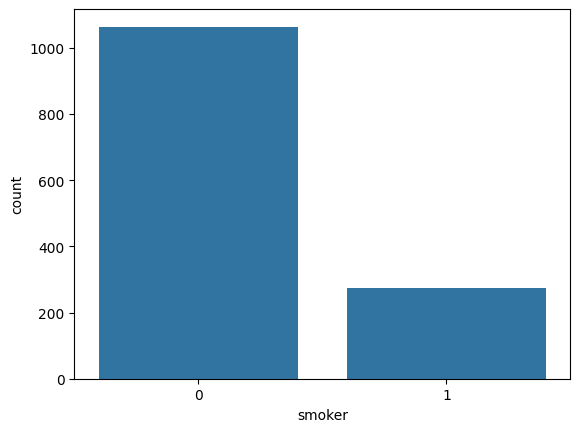

In [33]:
sns.countplot(x =data['smoker']) # 비흡연자가 더 많다고 볼 수 있다.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [8]:
round(data.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [9]:
X = data[['age','sex','bmi','children','smoker']]
y = data['charges']

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=100)

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
pred = lr.predict(X_test)
pred

array([ 4765.24946593,  4957.73086482,  8298.98815254,  3078.81186784,
       24165.95654247, 36827.72848649, 14683.34729348,  2599.3384217 ,
       29378.62194348, 16011.75090087, 15493.17858732,  5101.23688482,
       11011.10641383,  4161.31766196,  9810.62254709, 31856.8853975 ,
       12016.55190749, 13235.61067675,  7251.8789603 , 18394.80961708,
       14393.20060321,  3253.85100146,  6715.71478454, 31290.24757633,
       13776.33709853, 31904.24021054,  6397.17630407, 39339.48397832,
       31565.9666249 , 13742.23078678, 18448.10494977,  2282.95976263,
       38922.93999878, 26116.16609375,  8866.70869349, 12036.24255782,
        8406.17827743, 32351.5635203 ,  3959.06572303, 38354.72996424,
        8219.4129384 , 12308.73069101,  5604.28772112,  8468.4404493 ,
         651.06780185,  5503.69704365,  5673.30373447,  3843.67247433,
        2098.72488739, 11186.31121281, 17460.67125615,  7916.72813038,
        5042.69712676,  8273.18990771,  7541.05592985, 14372.15862948,
      

예측 모델 평가하기

* 테이블로 출력하기
* 그래프로 출력하기
* 통계적인 방법을 평가하기

In [15]:
comparison = pd.DataFrame({
    'actual' : y_test,
    'pred' : pred
})
comparison
# 첫 번째 관측치를 보면 실제값은 1826 예측값은 4765 정도로 차이가 크다
# 마지막 관측치를 보면 실제값은 12124 예측값은 11638로 그나마 비슷하다
# 이런 식으로 보면 하나하나 확인하는 방식으로 한계가 있다.

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


Text(0, 0.5, 'pred')

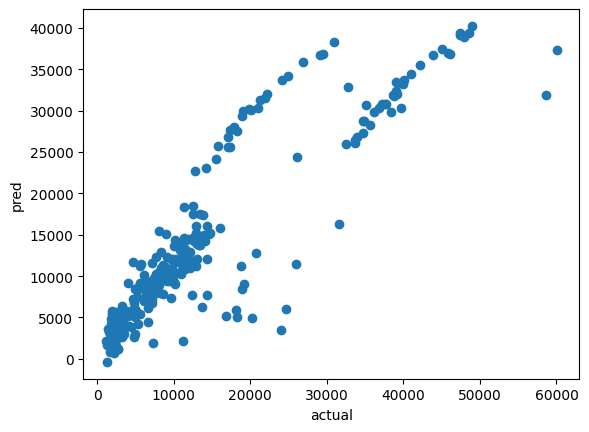

In [18]:
plt.scatter(x='actual',y='pred',data=comparison)
plt.xlabel('actual')
plt.ylabel('pred')

In [25]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred) ** 0.5

5684.927776334484

In [24]:
mean_squared_error(y_test,pred,squared=False)

C:\Users\kjb00\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


5684.927776334484

In [26]:
lr.score(X_train,y_train)

0.7368220127747351

In [29]:
pd.Series(lr.coef_,index=X.columns) # 독립변수들의 기울기

age           264.799803
sex            17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [30]:
lr.intercept_

-11576.999976112374